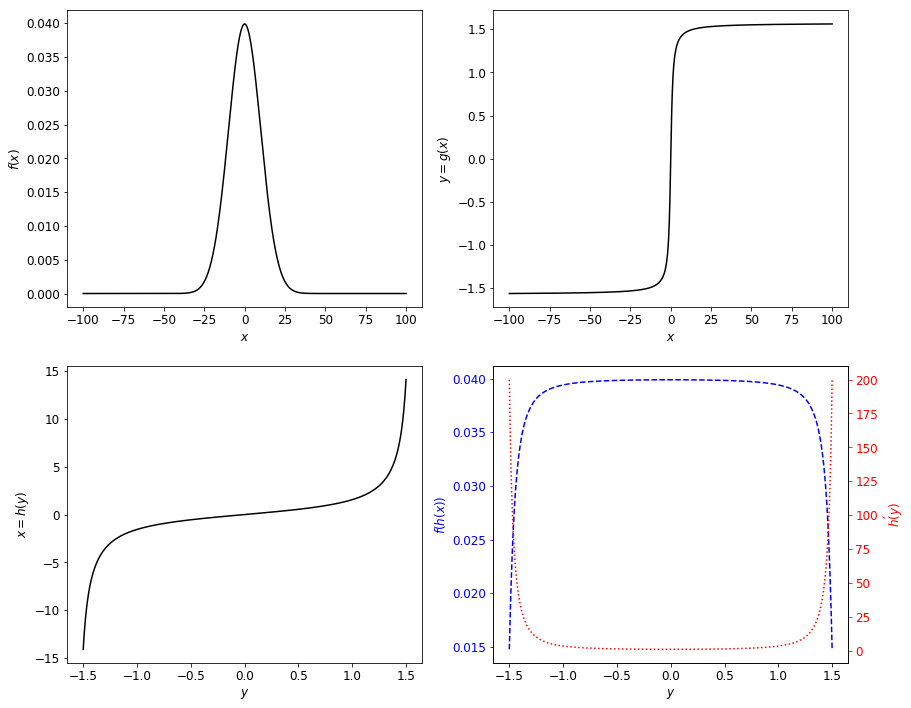

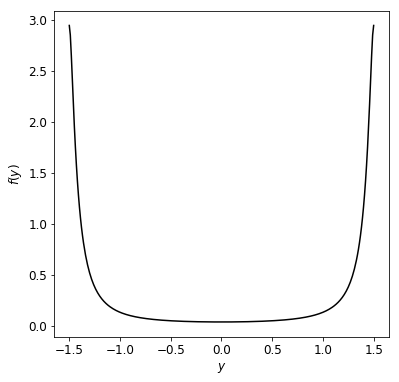

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

def func_g(x):
    '''
    y=g(x)
    '''
    y = np.arctan(x) 
    return y

def func_f_x(x, mu=0.,sig=10.):
    '''
    probability density function f(x)
    '''
    f_x = 1./(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))
    return f_x

def func_h(y):
    '''
    h(y), inverse function of g(x)
    '''
    x = np.tan(y)
    return x

def derive_h(y):
    '''
    h'(y), derivative of x=h(y)
    '''
    h_prime = 1./np.cos(y)**2
    return h_prime

def func_f_y(y, mu=0.,sig=10.):
    '''
    propagate distribution fromx to y
    '''
    return func_f_x(func_h(y),mu=mu,sig=sig)*np.abs(derive_h(y))

x = np.arange(-100,100.1,0.1)
fig = plt.figure(figsize=[14,12])
ax = fig.add_subplot(221)
ax.plot(x,func_f_x(x),'k-')
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'$f(x)$',fontsize=12)

ax = fig.add_subplot(222)
ax.plot(x,func_g(x),'k-')
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'$y=g(x)$',fontsize=12)

y = np.arange(-1.5,1.51,0.01)
ax = fig.add_subplot(223)
ax.plot(y,func_h(y),'k-')
ax.set_xlabel(r'$y$',fontsize=12)
ax.set_ylabel(r'$x=h(y)$',fontsize=12)

ax = fig.add_subplot(224)

ax2 = ax.twinx()
ax.plot(y,func_f_x(func_h(y)),'b--')
ax2.plot(y,np.abs(derive_h(y)),'r:')
ax.set_xlabel(r'$y$',fontsize=12)
ax.set_ylabel(r'$f(h(x))$',fontsize=12,color='b')
ax.tick_params('y',colors='b')
ax2.set_ylabel(r'$h\'(y)$',fontsize=12,color='r')
ax2.tick_params('y',colors='r')
fig.show()
fig.savefig('propagatedist_1.pdf',bbox_inches='tight')

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(y,func_f_y(y),'k-')
ax.set_xlabel(r'$y$',fontsize=12)
ax.set_ylabel(r'$f(y)$',fontsize=12)
fig.show()
fig.savefig('propagatedist_2.pdf',bbox_inches='tight')

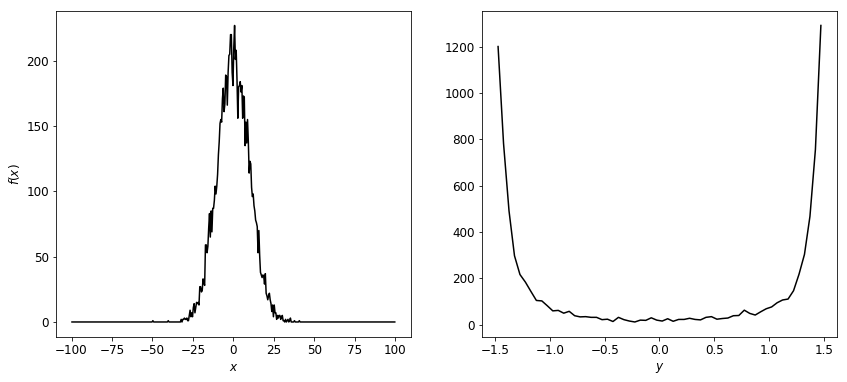

In [34]:
x = np.random.normal(0.,10.,size=10000)
y = func_g(x)

xgrid = np.arange(-100,100.5,0.5)
xcenter = (xgrid[1:]+xgrid[:-1])/2.
hx,xedge = np.histogram(x,bins=xgrid)

ygrid = np.arange(-1.5,1.55,0.05)
ycenter = (ygrid[1:]+ygrid[:-1])/2.
hy,xedge = np.histogram(y,bins=ygrid)

fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(121)
ax.plot(xcenter,hx,'k-')
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'$f(x)$',fontsize=12)

ax = fig.add_subplot(122)
ax.plot(ycenter,hy,'k-')
ax.set_xlabel(r'$y$',fontsize=12)
fig.show()
#fig.savefig('propagatedist_2.pdf',bbox_inches='tight')